In [1]:
# cas 서버에 접속
import swat
# import dlpy
swat.__version__

'1.5.2'

In [2]:
# CAS 객체 생성자
conn = swat.CAS(hostname='http://13.124.157.75/cas-shared-default-http/',
                port=8777)
conn

CAS('13.124.157.75', 8777, 'viyademo01', protocol='http', name='py-session-1', session='e61aff2c-d318-7841-a020-6264f9633b39')

In [3]:
# CAS 클래스
type(conn)

swat.cas.connection.CAS

In [4]:
# dir(conn)

In [5]:
# 카스 객체 메서드
r = conn.serverstatus()
r

NOTE: Grid node action status report: 4 nodes, 53 total actions executed.


[About]

 {'CAS': 'Cloud Analytic Services',
  'Copyright': 'Copyright Â© 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2022-12-19T10:33:32Z',
  'System': {'Hostname': 'casc.sas.com',
   'Linux Distribution': 'Red Hat Enterprise Linux Server release 7.6 (Maipo)',
   'Model Number': 'x86_64',
   'OS Family': 'LIN X64',
   'OS Name': 'Linux',
   'OS Release': '3.10.0-957.12.2.el7.x86_64',
   'OS Version': '#1 SMP Fri Apr 19 21:09:07 UTC 2019'},
  'Version': '3.05',
  'VersionLong': 'V.03.05M0P11062019',
  'license': {'expires': '12Apr2023:00:00:00',
   'gracePeriod': 45,
   'site': 'INTERNAL_TEST_MPP_FULL',
   'siteNum': 70180938,
   'warningPeriod': 45}}

[nodestatus]

 Node Status
 
             name        role  uptime  running  stalled
 0  casw1.sas.com      worker  20.038        0        0
 1  casw2.sas.com      worker  20.038        0        0
 2  casw3.sas.com      worker  20.038        0        0
 3   casc.sas.com  controller  20.105        0        0

[server]

 Server Status
 
    nodes  actions
 0      4       53

+ Elapsed: 0.00511s, user: 0.0011s, sys: 0.00616s, mem: 1.23mb

In [6]:
# 결과 클래스
type(r)

swat.cas.results.CASResults

In [7]:
# CASResults 클래스의 정체
isinstance(r, dict)

True

In [8]:
r.keys()

odict_keys(['About', 'nodestatus', 'server'])

In [9]:
[[key, type(value)] for key, value in r.items()]

[['About', dict],
 ['nodestatus', swat.dataframe.SASDataFrame],
 ['server', swat.dataframe.SASDataFrame]]

In [10]:
for key, value in r.items():
    print(key, type(value))

About <class 'dict'>
nodestatus <class 'swat.dataframe.SASDataFrame'>
server <class 'swat.dataframe.SASDataFrame'>


In [11]:
# SASDataFrame?
import pandas as pd
isinstance(r['server'], pd.DataFrame)

True

# 2. 카스 라이브러리
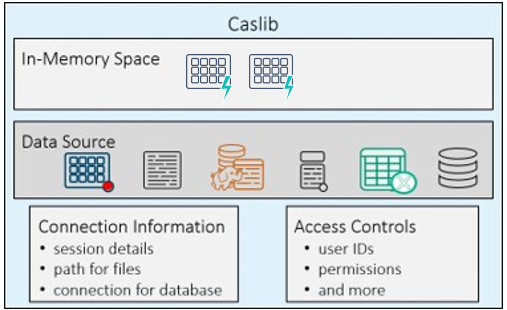

In [12]:
# 라이브러리 보기
conn.caslibinfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,AdaptiveLearningData,PATH,Stores historical and learning tables created ...,/opt/sas/viya/config/data/cas/default/adaptive...,,0.0,0.0,0.0,0.0,0.0,0.0
1,AdaptiveLearningStore,PATH,Stores model analytic stores created by Adapti...,/opt/sas/viya/config/data/cas/default/adaptive...,,0.0,0.0,0.0,0.0,0.0,0.0
2,CASORA,oracle,,,uid = 'lgdpoc',0.0,0.0,0.0,0.0,0.0,0.0
3,CASUSER(viyademo01),PATH,Personal File System Caslib,/home/viyademo01/casuser/,,1.0,0.0,0.0,1.0,0.0,1.0
4,CASUSERHDFS(viyademo01),HDFS,Personal HDFS Caslib,/user/viyademo01/,,1.0,0.0,1.0,1.0,0.0,1.0
5,CPSAppData,PATH,Stores data for the planning service.,/opt/sas/viya/config/data/cas/default/cpsAppData/,,0.0,0.0,0.0,0.0,0.0,0.0
6,Formats,PATH,Stores user defined formats.,/opt/sas/viya/config/data/cas/default/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
7,kal_source,PATH,,/home/viyademo20/KAL_VTA/Data/,,0.0,0.0,0.0,0.0,0.0,0.0
8,ModelPerformanceData,PATH,Library for Model Management performance objects.,/opt/sas/viya/config/data/cas/default/modelMon...,,0.0,0.0,0.0,0.0,0.0,0.0
9,Models,PATH,Stores models created by Visual Analytics for ...,/opt/sas/viya/config/data/cas/default/models/,,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 활동 라이브러리를 지정해주기
conn.sessionProp.setSessOpt(caslib='casuser')

NOTE: 'CASUSER(viyademo01)' is now the active caslib.


+ Elapsed: 0.0047s, user: 0.00309s, sys: 0.00468s, mem: 1.01mb

In [14]:
# 디폴트는 활동라이브러리
conn.tableinfo()

NOTE: No tables are available in caslib CASUSER(viyademo01) of Cloud Analytic Services.


+ Elapsed: 0.00427s, user: 0.0039s, sys: 0.00297s, mem: 1.15mb

In [15]:
conn.tableinfo(caslib='casuserhdfs')

NOTE: No tables are available in caslib CASUSERHDFS(viyademo01) of Cloud Analytic Services.


+ Elapsed: 0.00516s, user: 0.000997s, sys: 0.00716s, mem: 1.14mb

In [16]:
conn.fileinfo()

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,viyademo01,sasusers,cars.sashdat,80400,NONE,2020-01-08T04:24:50+00:00,1.894077e+09
1,-rwxr-xr-x,viyademo01,sasusers,forest_model_astore.sashdat,22763888,NONE,2020-01-08T06:30:22+00:00,1.894084e+09
2,-rw-r--r--,viyademo01,sasusers,buytest.sas7bdat,1966080,,2020-07-23T04:18:03+00:00,1.911097e+09
3,-rw-r--r--,viyademo01,sasusers,EG_DEMO_2.xlsx,380241,,2020-07-23T04:25:47+00:00,1.911098e+09
4,-rwxr-xr-x,viyademo01,sasusers,INSSUBRO_K.sashdat,743640,NONE,2020-10-29T05:33:50+00:00,1.919569e+09
5,-rwxr-xr-x,viyademo01,sasusers,hmeq_lb.sashdat,632920,NONE,2020-11-24T08:26:02+00:00,1.921826e+09
6,-rwxr-xr-x,viyademo01,sasusers,tmpScoreData_bc.sashdat,1062816,NONE,2021-10-18T06:02:19+00:00,1.950156e+09
7,-rwxr-xr-x,viyademo01,sasusers,HMEQ.sashdat,680000,NONE,2022-06-02T06:47:15+00:00,1.969772e+09
8,-rwxr-xr-x,viyademo01,sasusers,claim.sahdat.sashdat,3361280,NONE,2022-09-02T10:02:23+00:00,1.977732e+09
9,-rwxr-xr-x,viyademo01,sasusers,claim.sashdat,3361280,NONE,2022-09-02T10:03:30+00:00,1.977732e+09


In [17]:
# 라이브러리 내에 있는 멤버 가져오기
conn.loadtable(path='claim.sashdat', caslib='casuser', casout={'caslib':'casuserhdfs', 'replace':True})

NOTE: Cloud Analytic Services made the file claim.sashdat available as table CLAIM in caslib CASUSERHDFS(viyademo01).


[caslib]

 'CASUSERHDFS(viyademo01)'

[tableName]

 'CLAIM'

[casTable]

 CASTable('CLAIM', caslib='CASUSERHDFS(viyademo01)')

+ Elapsed: 0.0257s, user: 0.0122s, sys: 0.0388s, mem: 9.18mb

In [18]:
conn.tableinfo(caslib='casuser')

NOTE: No tables are available in caslib CASUSER(viyademo01) of Cloud Analytic Services.


+ Elapsed: 0.00437s, user: 0.00444s, sys: 0.00298s, mem: 1.14mb

# 3. 카스 테이블

In [19]:
# 데이터 읽기: claim
url = 'https://github.com/bong-ju-kang/data/blob/master/claim.csv?raw=true'
dt = conn.read_csv(url)
dt

NOTE: Cloud Analytic Services made the uploaded file available as table TMP63S07HY5 in caslib CASUSER(viyademo01).
NOTE: The table TMP63S07HY5 has been created in caslib CASUSER(viyademo01) from binary data uploaded to Cloud Analytic Services.


CASTable('TMP63S07HY5', caslib='CASUSER(viyademo01)')

In [20]:
# table 액션셋을 이용
out = conn.upload(url, casout={'replace':True})
out

NOTE: Cloud Analytic Services made the uploaded file available as table CLAIM in caslib CASUSER(viyademo01).
NOTE: The table CLAIM has been created in caslib CASUSER(viyademo01) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(viyademo01)'

[tableName]

 'CLAIM'

[casTable]

 CASTable('CLAIM', caslib='CASUSER(viyademo01)')

+ Elapsed: 0.0746s, user: 0.0709s, sys: 0.0749s, mem: 205mb

In [21]:
# 똑같은 결과
dt = out.casTable
dt

CASTable('CLAIM', caslib='CASUSER(viyademo01)')

In [22]:
conn.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TMP63S07HY5,10300,23,0,utf-8,2022-12-19T10:33:38+00:00,2022-12-19T10:33:38+00:00,2022-12-19T10:33:38+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:33:38+00:00,1.987065e+09
1,CLAIM,10300,23,0,utf-8,2022-12-19T10:33:39+00:00,2022-12-19T10:33:39+00:00,2022-12-19T10:33:39+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:33:39+00:00,1.987065e+09


In [23]:
conn.CASTable('claim').describe()

,id,child_driv,age,children,yoj,income,house_val,distance,vehicle_val,clm_freq,mvr_pts,claim_amount,vehicle_age,claim_ind
count,1.030000e+04,10300.000000,10293.000000,10300.000000,9752.000000,9730.000000,9.725000e+03,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,9661.000000,10300.000000
mean,4.537007e+09,0.170000,53.797921,0.720971,13.473954,62436.569270,4.168986e+05,78.419417,15660.132039,1.808641,3.202621,1810.642718,10.297899,0.266602
std,3.054959e+09,0.507381,13.172204,1.116310,4.109358,47461.614467,2.356174e+05,15.869675,8429.568867,1.528187,2.585899,4725.594945,5.713707,0.442204
min,1.130032e+07,0.000000,5.000000,0.000000,3.000000,560.000000,0.000000e+00,50.000000,1500.000000,0.000000,0.000000,115.000000,-1.000000,0.000000
25%,2.135167e+09,0.000000,45.000000,0.000000,12.000000,28468.000000,2.473380e+05,67.000000,9200.000000,0.000000,2.000000,278.000000,3.000000,0.000000
50%,3.964367e+09,0.000000,54.000000,0.000000,14.000000,54308.000000,3.886740e+05,78.000000,14400.000000,2.000000,3.000000,323.000000,10.000000,0.000000
75%,6.280766e+09,0.000000,63.000000,1.000000,16.000000,86978.000000,5.581550e+05,89.000000,20895.000000,3.000000,5.000000,1447.500000,14.000000,1.000000
max,2.020000e+10,4.000000,103.000000,5.000000,26.000000,367590.000000,1.586073e+06,187.000000,69740.000000,7.000000,17.000000,123616.000000,30.000000,1.000000


In [24]:
# 데이터 이름 명시
dt = conn.read_csv(url, casout={'name': 'claim', 'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table CLAIM in caslib CASUSER(viyademo01).
NOTE: The table CLAIM has been created in caslib CASUSER(viyademo01) from binary data uploaded to Cloud Analytic Services.


In [25]:
type(dt)

swat.cas.table.CASTable

In [26]:
dt.dtypes

id               double
child_driv       double
age              double
children         double
yoj              double
income           double
house_val        double
status          varchar
gender          varchar
edu_level       varchar
job             varchar
distance         double
car_use         varchar
vehicle_val      double
vehicle_type    varchar
clm_freq         double
revoked         varchar
mvr_pts          double
claim_amount     double
vehicle_age      double
claim_ind        double
area            varchar
state_code      varchar
dtype: object

In [27]:
# 데이터 구조
dt.info()

CASTable('CLAIM', caslib='CASUSER(viyademo01)')


/root/anaconda3/lib/python3.7/site-packages/swat/cas/table.py:2420: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return tblinfo.ix[0, 'Columns'] + len(computedvars)


Data columns (total 23 columns):
                  N   Miss     Type
id            10300  False   double
child_driv    10300  False   double
age           10293   True   double
children      10300  False   double
yoj            9752   True   double
income         9730   True   double
house_val      9725   True   double
status        10298   True  varchar
gender        10300  False  varchar
edu_level     10300  False  varchar
job            9635   True  varchar
distance      10300  False   double
car_use       10300  False  varchar
vehicle_val   10300  False   double
vehicle_type  10300  False  varchar
clm_freq      10300  False   double
revoked       10300  False  varchar
mvr_pts       10300  False   double
claim_amount  10300  False   double
vehicle_age    9661   True   double
claim_ind     10300  False   double
area          10300  False  varchar
state_code    10300  False  varchar
dtypes: double(14), varchar(9)
data size: 3347058
vardata size: 710258
memory usage: 0


In [28]:
dt.describe(include='all')

,id,child_driv,age,children,yoj,income,house_val,status,gender,edu_level,...,vehicle_val,vehicle_type,clm_freq,revoked,mvr_pts,claim_amount,vehicle_age,claim_ind,area,state_code
count,10300,10300,10293,10300,9752,9730,9725,10298,10300,10300,...,10300,10300,10300,10300,10300,10300,9661,10300,10300,10300
unique,9649,5,95,6,21,8451,6948,2,2,5,...,2985,8,8,2,17,2663,30,2,2,10
top,1.02e+10,0,54,0,15,960,141336,Yes,Fem,z_High School,...,1500,unknown,2,No,2,285,3,0,Highly Urban/ Urban,Bayern
freq,29,9062,347,6689,1500,392,56,6187,5545,2950,...,207,2883,3887,9039,2729,76,2488,7554,8228,5122
mean,4.53701e+09,0.17,53.7979,0.720971,13.474,62436.6,416899,NaN,NaN,NaN,...,15660.1,NaN,1.80864,NaN,3.20262,1810.64,10.2979,0.266602,NaN,NaN
std,3.05496e+09,0.507381,13.1722,1.11631,4.10936,47461.6,235617,NaN,NaN,NaN,...,8429.57,NaN,1.52819,NaN,2.5859,4725.59,5.71371,0.442204,NaN,NaN
min,1.13003e+07,0,5,0,3,560,0,Yes,Fem,<High School,...,1500,Family,0,No,0,115,-1,0,Highly Urban/ Urban,Bayern
25%,2.13517e+09,0,45,0,12,28468,247338,NaN,NaN,NaN,...,9200,NaN,0,NaN,2,278,3,0,NaN,NaN
50%,3.96437e+09,0,54,0,14,54308,388674,NaN,NaN,NaN,...,14400,NaN,2,NaN,3,323,10,0,NaN,NaN
75%,6.28077e+09,0,63,1,16,86978,558155,NaN,NaN,NaN,...,20895,NaN,3,NaN,5,1447.5,14,1,NaN,NaN


In [29]:
import pandas as pd
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 23 columns):
id              10300 non-null float64
child_driv      10300 non-null int64
age             10293 non-null float64
children        10300 non-null int64
yoj             9752 non-null float64
income          9730 non-null float64
house_val       9725 non-null float64
status          10298 non-null object
gender          10300 non-null object
edu_level       10300 non-null object
job             9635 non-null object
distance        10300 non-null int64
car_use         10300 non-null object
vehicle_val     10300 non-null int64
vehicle_type    10300 non-null object
clm_freq        10300 non-null int64
revoked         10300 non-null object
mvr_pts         10300 non-null int64
claim_amount    10300 non-null int64
vehicle_age     9661 non-null float64
claim_ind       10300 non-null int64
area            10300 non-null object
state_code      10300 non-null object
dtypes: float64(6), int6

In [30]:
dt = conn.CASTable('claim')
dt.info()

CASTable('claim')
Data columns (total 23 columns):
                  N   Miss     Type
id            10300  False   double
child_driv    10300  False   double
age           10293   True   double
children      10300  False   double
yoj            9752   True   double
income         9730   True   double
house_val      9725   True   double
status        10298   True  varchar
gender        10300  False  varchar
edu_level     10300  False  varchar
job            9635   True  varchar
distance      10300  False   double
car_use       10300  False  varchar
vehicle_val   10300  False   double
vehicle_type  10300  False  varchar
clm_freq      10300  False   double
revoked       10300  False  varchar
mvr_pts       10300  False   double
claim_amount  10300  False   double
vehicle_age    9661   True   double
claim_ind     10300  False   double
area          10300  False  varchar
state_code    10300  False  varchar
dtypes: double(14), varchar(9)
data size: 3347058
vardata size: 710258
memory usage: 

In [31]:
# 클라이언트와 서버의 데이터 셋 확인요
dt.pop('id')
dt.info()

CASTable('claim')[['child_driv', 'age', 'children', 'yoj', 'income', 'house_val', 'status', 'gender', 'edu_level', 'job', 'distance', 'car_use', 'vehicle_val', 'vehicle_type', 'clm_freq', 'revoked', 'mvr_pts', 'claim_amount', 'vehicle_age', 'claim_ind', 'area', 'state_code']]
Data columns (total 22 columns):
                  N   Miss     Type
child_driv    10300  False   double
age           10293   True   double
children      10300  False   double
yoj            9752   True   double
income         9730   True   double
house_val      9725   True   double
status        10298   True  varchar
gender        10300  False  varchar
edu_level     10300  False  varchar
job            9635   True  varchar
distance      10300  False   double
car_use       10300  False  varchar
vehicle_val   10300  False   double
vehicle_type  10300  False  varchar
clm_freq      10300  False   double
revoked       10300  False  varchar
mvr_pts       10300  False   double
claim_amount  10300  False   double
vehicl

In [32]:
dt.columns

Index(['child_driv', 'age', 'children', 'yoj', 'income', 'house_val', 'status',
       'gender', 'edu_level', 'job', 'distance', 'car_use', 'vehicle_val',
       'vehicle_type', 'clm_freq', 'revoked', 'mvr_pts', 'claim_amount',
       'vehicle_age', 'claim_ind', 'area', 'state_code'],
      dtype='object')

In [33]:
# 서버에는 살아 있음
conn.CASTable('claim').columns

Index(['id', 'child_driv', 'age', 'children', 'yoj', 'income', 'house_val',
       'status', 'gender', 'edu_level', 'job', 'distance', 'car_use',
       'vehicle_val', 'vehicle_type', 'clm_freq', 'revoked', 'mvr_pts',
       'claim_amount', 'vehicle_age', 'claim_ind', 'area', 'state_code'],
      dtype='object')

In [34]:
dt.columns.tolist()

['child_driv',
 'age',
 'children',
 'yoj',
 'income',
 'house_val',
 'status',
 'gender',
 'edu_level',
 'job',
 'distance',
 'car_use',
 'vehicle_val',
 'vehicle_type',
 'clm_freq',
 'revoked',
 'mvr_pts',
 'claim_amount',
 'vehicle_age',
 'claim_ind',
 'area',
 'state_code']

# 4. 액션셋

In [35]:
# 액션셋 = 패키지 또는 모듈
conn.actionsetinfo()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,aggregation,Aggregation,1,tkcasagg,3.05.000,crsaggregate,false
3,builtins,Builtins,1,tkcasablt,3.05.000,tkcas,false
4,configuration,Server Properties,1,tkcascfg,3.05.000,tkcas,false
5,dataPreprocess,Data Preprocess,1,tktrans,3.05.000,crsstat,false
6,dataStep,DATA Step,1,datastep,3.05.000,tkcas,false
7,percentile,Percentile,1,tkcasptl,3.05.000,crsstat,false
8,search,Search,1,casidx,3.05.000,crssearch,false
9,session,Session Methods,1,tkcsessn,3.05.000,tkcas,false


In [36]:
#  actionsetinfo()는 builtins 액션셋 에 속함
conn.builtins.actionsetinfo()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,aggregation,Aggregation,1,tkcasagg,3.05.000,crsaggregate,false
3,builtins,Builtins,1,tkcasablt,3.05.000,tkcas,false
4,configuration,Server Properties,1,tkcascfg,3.05.000,tkcas,false
5,dataPreprocess,Data Preprocess,1,tktrans,3.05.000,crsstat,false
6,dataStep,DATA Step,1,datastep,3.05.000,tkcas,false
7,percentile,Percentile,1,tkcasptl,3.05.000,crsstat,false
8,search,Search,1,casidx,3.05.000,crssearch,false
9,session,Session Methods,1,tkcsessn,3.05.000,tkcas,false


In [37]:
# table 액션셋의 액션들
conn.help(actionset='table')

NOTE: Information for action set 'table':
NOTE:    table
NOTE:       view - Creates a view from files or tables
NOTE:       attribute - Manages extended table attributes
NOTE:       upload - Transfers binary data to the server to create objects like tables
NOTE:       loadTable - Loads a table from a caslib's data source
NOTE:       tableExists - Checks whether a table has been loaded
NOTE:       index - Create indexes on one or more table variables
NOTE:       columnInfo - Shows column information
NOTE:       fetch - Fetches rows from a table or view
NOTE:       save - Saves a table to a caslib's data source
NOTE:       addTable - Add a table by sending it from the client to the server
NOTE:       tableInfo - Shows information about a table
NOTE:       tableDetails - Get detailed information about a table
NOTE:       dropTable - Drops a table
NOTE:       deleteSource - Delete a table or file from a caslib's data source
NOTE:       fileInfo - Lists the files in a caslib's data source
N

,name,description
0,view,Creates a view from files or tables
1,attribute,Manages extended table attributes
2,upload,Transfers binary data to the server to create ...
3,loadTable,Loads a table from a caslib's data source
4,tableExists,Checks whether a table has been loaded
5,index,Create indexes on one or more table variables
6,columnInfo,Shows column information
7,fetch,Fetches rows from a table or view
8,save,Saves a table to a caslib's data source
9,addTable,Add a table by sending it from the client to t...


In [38]:
# 카스테이블 지정
dt = conn.CASTable('claim')

In [39]:
dt.simple.summary()
# dt.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,id,11300316.0,2.020000e+10,10300.0,0.0,4.537007e+09,4.673117e+13,3.054959e+09,3.010140e+07,9.332772e+18,3.081379e+23,9.611822e+22,67.334228,150.724110,0.000000e+00,0.961688,0.777342
1,child_driv,0.0,4.000000e+00,10300.0,0.0,1.700000e-01,1.751000e+03,5.073812e-01,4.999375e-03,2.574357e-01,2.949000e+03,2.651330e+03,298.459524,34.004248,2.689376e-240,3.332569,11.595267
2,age,5.0,1.030000e+02,10293.0,7.0,5.379792e+01,5.537420e+05,1.317220e+01,1.298337e-01,1.735070e+02,3.157590e+07,1.785734e+06,24.484597,414.360189,0.000000e+00,-0.005356,0.032104
3,children,0.0,5.000000e+00,10300.0,0.0,7.209709e-01,7.426000e+03,1.116310e+00,1.099933e-02,1.246147e+00,1.818800e+04,1.283407e+04,154.834222,65.546824,0.000000e+00,1.334891,0.623757
4,yoj,3.0,2.600000e+01,9752.0,548.0,1.347395e+01,1.313980e+05,4.109358e+00,4.161281e-02,1.688682e+01,1.935114e+06,1.646634e+05,30.498528,323.793382,0.000000e+00,-1.200628,1.143854
5,income,560.0,3.675900e+05,9730.0,570.0,6.243657e+04,6.075078e+08,4.746161e+04,4.811562e+02,2.252605e+09,5.984630e+13,2.191559e+13,76.015731,129.763618,0.000000e+00,1.161994,1.988531
6,house_val,0.0,1.586073e+06,9725.0,575.0,4.168986e+05,4.054339e+09,2.356174e+05,2.389255e+03,5.551555e+10,2.230081e+15,5.398332e+14,56.516716,174.488934,0.000000e+00,0.674600,0.469599
7,distance,50.0,1.870000e+02,10300.0,0.0,7.841942e+01,8.077200e+05,1.586968e+01,1.563686e-01,2.518466e+02,6.593470e+07,2.593768e+06,20.236921,501.503744,0.000000e+00,0.435261,0.594793
8,vehicle_val,1500.0,6.974000e+04,10300.0,0.0,1.566013e+04,1.612994e+08,8.429569e+03,8.305901e+01,7.105763e+07,3.257792e+12,7.318225e+11,53.828211,188.542243,0.000000e+00,0.769236,0.651432
9,clm_freq,0.0,7.000000e+00,10300.0,0.0,1.808641e+00,1.862900e+04,1.528187e+00,1.505768e-02,2.335356e+00,5.774500e+04,2.405183e+04,84.493680,120.114210,0.000000e+00,0.502681,-0.305203


In [40]:
dt.summary()['Summary'][['Column', 'NMiss']]

,Column,NMiss
0,id,0.0
1,child_driv,0.0
2,age,7.0
3,children,0.0
4,yoj,548.0
5,income,570.0
6,house_val,575.0
7,distance,0.0
8,vehicle_val,0.0
9,clm_freq,0.0


In [41]:
# 새로운 액션셋 로드
conn.loadActionSet('dataSciencePilot')

NOTE: Added action set 'dataSciencePilot'.


[actionset]

 'dataSciencePilot'

+ Elapsed: 0.00623s, user: 0.00343s, sys: 0.00975s, mem: 0.884mb

In [42]:
# 액션 확인
conn.help(actionset='dataSciencePilot')

NOTE: Information for action set 'dataSciencePilot':
NOTE:    dataSciencePilot
NOTE:       exploreData - Exploration, automatic variable analysis and grouping using comprehensive statistical profiling of the variables.
NOTE:       screenVariables - Screens noise variables and variables that need special transformations to be useful in the downstream analytics.
NOTE:       analyzeMissingPatterns - Missing pattern analysis
NOTE:       exploreCorrelation - Explore linear and nonlinear correlation among the variables.
NOTE:       detectInteractions - Variable interaction detection and ranking
NOTE:       generateShadowFeatures - Generate shadow features.
NOTE:       featureMachine - Automated feature transformation and generation engine
NOTE:       selectFeatures - Feature selection
NOTE:       dsAutoMl - Automated machine learning pipeline exploration, execution and ranking.


,name,description
0,exploreData,"Exploration, automatic variable analysis and g..."
1,screenVariables,Screens noise variables and variables that nee...
2,analyzeMissingPatterns,Missing pattern analysis
3,exploreCorrelation,Explore linear and nonlinear correlation among...
4,detectInteractions,Variable interaction detection and ranking
5,generateShadowFeatures,Generate shadow features.
6,featureMachine,Automated feature transformation and generatio...
7,selectFeatures,Feature selection
8,dsAutoMl,Automated machine learning pipeline exploratio...


In [43]:
# 데이터 탐색 액션(exploreData) in dataSciencePilot
dt.exploreData(
    casout={'name': 'explore_out', 'caslib':'casuser', 'replace': True}
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(viyademo01),explore_out,23,42,"CASTable('explore_out', caslib='CASUSER(viyade..."


In [44]:
conn.CASTable('explore_out').head(999)

,Variable,VarType,MissingRated,CardinalityRated,EntropyRated,IQVRated,CVRated,SkewnessRated,KurtosisRated,OutlierRated,...,MomentCVPer,RobustCVPer,MomentSkewness,RobustSkewness,MomentKurtosis,RobustKurtosis,LowerOutlierMomentPer,UpperOutlierMomentPer,LowerOutlierRobustPer,UpperOutlierRobustPer
0,status,character-nominal,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gender,character-nominal,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,edu_level,character-nominal,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,job,character-nominal,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,car_use,character-nominal,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,vehicle_type,character-nominal,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,revoked,character-nominal,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,area,character-nominal,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,state_code,character-nominal,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,id,interval,1.0,NaN,NaN,NaN,3.0,1.0,1.0,2.0,...,67.334228,104.571530,0.961688,0.716593,0.777342,-0.032763,0.0,2.242718,0.000000,0.330097


## 실습

In [45]:
url = 'https://github.com/bong-ju-kang/data/raw/master/gcr.csv'

In [46]:
out = conn.upload(url, casout={'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table GCR in caslib CASUSER(viyademo01).
NOTE: The table GCR has been created in caslib CASUSER(viyademo01) from binary data uploaded to Cloud Analytic Services.


In [47]:
dt2 = out.casTable
dt2.head()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,...,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1.0
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,0.0
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1.0
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1.0
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,0.0


In [48]:
# 2)
dt2.dtypes

checking    varchar
duration     double
history     varchar
purpose     varchar
amount       double
savings     varchar
employed    varchar
installp     double
marital     varchar
coapp       varchar
resident     double
property    varchar
age          double
other       varchar
housing     varchar
existcr      double
job         varchar
depends      double
telephon    varchar
foreign     varchar
good_bad     double
dtype: object

In [49]:
# 4)
dt2['resident'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd2258f90>]],
      dtype=object)

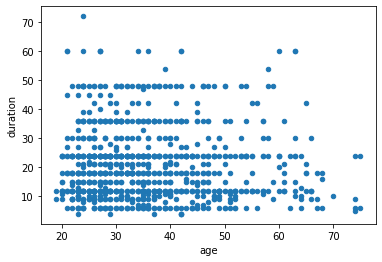

In [50]:
dt2.plot.scatter('age', 'duration')

# 5. 전처리

In [51]:
# 모델 1개를 생성하고 저장하는 방법

In [52]:
# 변수명 및 변수형 확인
dt.info()

CASTable('claim')


/root/anaconda3/lib/python3.7/site-packages/swat/cas/table.py:2420: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return tblinfo.ix[0, 'Columns'] + len(computedvars)


Data columns (total 23 columns):
                  N   Miss     Type
id            10300  False   double
child_driv    10300  False   double
age           10293   True   double
children      10300  False   double
yoj            9752   True   double
income         9730   True   double
house_val      9725   True   double
status        10298   True  varchar
gender        10300  False  varchar
edu_level     10300  False  varchar
job            9635   True  varchar
distance      10300  False   double
car_use       10300  False  varchar
vehicle_val   10300  False   double
vehicle_type  10300  False  varchar
clm_freq      10300  False   double
revoked       10300  False  varchar
mvr_pts       10300  False   double
claim_amount  10300  False   double
vehicle_age    9661   True   double
claim_ind     10300  False   double
area          10300  False  varchar
state_code    10300  False  varchar
dtypes: double(14), varchar(9)
data size: 3347058
vardata size: 710258
memory usage: 0


In [53]:
# 목표변수 분포 확인
dt['claim_ind'].value_counts()

0.0    7554
1.0    2746
dtype: int64

In [54]:
# 목표변수 분포 확인
dt['claim_ind'].value_counts(normalize=True)

0.0    0.733398
1.0    0.266602
dtype: float64

In [55]:

# 사전 정의 매크로 변수
target ='claim_ind'
event = '1.0'

# 변수 정의
xvars = [x for x in dt.columns.tolist() if x not in ['id', 'claim_amount', target]]
classvars = dt.columns[dt.dtypes=='varchar'].tolist()
[x for x in dt.select_dtypes('varchar').columns.tolist() if x != target ]
xvars, classvars

(['child_driv',
  'age',
  'children',
  'yoj',
  'income',
  'house_val',
  'status',
  'gender',
  'edu_level',
  'job',
  'distance',
  'car_use',
  'vehicle_val',
  'vehicle_type',
  'clm_freq',
  'revoked',
  'mvr_pts',
  'vehicle_age',
  'area',
  'state_code'],
 ['status',
  'gender',
  'edu_level',
  'job',
  'car_use',
  'vehicle_type',
  'revoked',
  'area',
  'state_code'])

In [56]:
# sampling actionset 적재
conn.loadactionset('sampling')

NOTE: Added action set 'sampling'.


[actionset]

 'sampling'

+ Elapsed: 0.00807s, user: 0.00329s, sys: 0.0136s, mem: 0.841mb

In [57]:
# 데이터 분할
conn.sampling.stratified(
    
    # 데이터 대상
    table = {'name':dt, 'groupby':target},
    
    # 비율 지정
    samppct = 70, 
    
    # 분할 변수 출력 여부 결정
    partInd = True,
    
    # 출력 테이블 지정
    output = {'casout':{'name':'claim_part', 'replace':True}, 'copyVars':"ALL"}

)

NOTE: Stratified sampling is in effect.
NOTE: Using SEED=1068323815 for sampling.


[OutputCasTables]

                 casLib        Name Label   Rows  Columns  \
 0  CASUSER(viyademo01)  claim_part        10300       24   
 
                                             casTable  
 0  CASTable('claim_part', caslib='CASUSER(viyadem...  

[STRAFreq]

 Frequencies
 
    ByGrpID     claim_ind  NObs  NSamp
 0        0             0  7554   5288
 1        1             1  2746   1922

+ Elapsed: 0.0724s, user: 0.101s, sys: 0.123s, mem: 299mb

In [58]:
# 분할 변수: _PartInd_
conn.CASTable('claim_part').info()

CASTable('claim_part')
Data columns (total 24 columns):
                  N   Miss     Type
id            10300  False   double
child_driv    10300  False   double
age           10293   True   double
children      10300  False   double
yoj            9752   True   double
income         9730   True   double
house_val      9725   True   double
status        10298   True  varchar
gender        10300  False  varchar
edu_level     10300  False  varchar
job            9635   True  varchar
distance      10300  False   double
car_use       10300  False  varchar
vehicle_val   10300  False   double
vehicle_type  10300  False  varchar
clm_freq      10300  False   double
revoked       10300  False  varchar
mvr_pts       10300  False   double
claim_amount  10300  False   double
vehicle_age    9661   True   double
claim_ind     10300  False   double
area          10300  False  varchar
state_code    10300  False  varchar
_PartInd_     10300  False   double
dtypes: double(15), varchar(9)
data size: 34

In [59]:
# 훈련 데이터 지정
train = conn.CASTable('claim_part', where='_PartInd_=1').drop('_PartInd_', axis=1)
train.shape

(7210, 23)

## 결측값 처리

In [60]:
# 결측값 처리 대상 보기
train.nmiss()

id                0
child_driv        0
age               7
children          0
yoj             387
income          403
house_val       397
status            2
gender            0
edu_level         0
job             459
distance          0
car_use           0
vehicle_val       0
vehicle_type      0
clm_freq          0
revoked           0
mvr_pts           0
claim_amount      0
vehicle_age     440
claim_ind         0
area              0
state_code        0
dtype: int64

In [61]:
# 결측값 처리
train.dataPreprocess.impute(
    
    # 결측값 처리 방식
    methodInterval='mean',
    methodNominal = 'mode',
    
    # 처리 변수
    inputs = xvars,
    
    # 결과 테이블
    casout={'name':'train_impute_out', 'replace':True},  
    copyVars = target,
    
    # 모델 저장: sas data 로 저장
    code = {'casout':{'name':'impute_code', 'replace':True}} 
    
)

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
0,child_driv,Mean,IMP_child_driv,7210.0,0.0,0.165742,
1,age,Mean,IMP_age,7203.0,7.0,53.893655,
2,children,Mean,IMP_children,7210.0,0.0,0.710680,
3,yoj,Mean,IMP_yoj,6823.0,387.0,13.449216,
4,income,Mean,IMP_income,6807.0,403.0,62371.662406,
5,house_val,Mean,IMP_house_val,6813.0,397.0,416470.439748,
6,status,Mode,IMP_status,7208.0,2.0,NaN,Yes
7,gender,Mode,IMP_gender,7210.0,0.0,NaN,Fem
8,edu_level,Mode,IMP_edu_level,7210.0,0.0,NaN,z_High School
9,job,Mode,IMP_job,6751.0,459.0,NaN,Teacher


In [62]:
# 모델 저장
conn.table.save(
    # 대상
    table='impute_code',
    # 저장명...
    name='impute_code', caslib='casuser', replace=True
)

NOTE: Cloud Analytic Services saved the file impute_code.sashdat in caslib CASUSER(viyademo01).


[caslib]

 'CASUSER(viyademo01)'

[name]

 'impute_code.sashdat'

+ Elapsed: 0.0197s, user: 0.0121s, sys: 0.0189s, mem: 18.1mb

In [63]:
# 저장 모델 확인
conn.fileinfo()


,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,viyademo01,sasusers,cars.sashdat,80400,NONE,2020-01-08T04:24:50+00:00,1.894077e+09
1,-rwxr-xr-x,viyademo01,sasusers,forest_model_astore.sashdat,22763888,NONE,2020-01-08T06:30:22+00:00,1.894084e+09
2,-rw-r--r--,viyademo01,sasusers,buytest.sas7bdat,1966080,,2020-07-23T04:18:03+00:00,1.911097e+09
3,-rw-r--r--,viyademo01,sasusers,EG_DEMO_2.xlsx,380241,,2020-07-23T04:25:47+00:00,1.911098e+09
4,-rwxr-xr-x,viyademo01,sasusers,INSSUBRO_K.sashdat,743640,NONE,2020-10-29T05:33:50+00:00,1.919569e+09
5,-rwxr-xr-x,viyademo01,sasusers,hmeq_lb.sashdat,632920,NONE,2020-11-24T08:26:02+00:00,1.921826e+09
6,-rwxr-xr-x,viyademo01,sasusers,tmpScoreData_bc.sashdat,1062816,NONE,2021-10-18T06:02:19+00:00,1.950156e+09
7,-rwxr-xr-x,viyademo01,sasusers,HMEQ.sashdat,680000,NONE,2022-06-02T06:47:15+00:00,1.969772e+09
8,-rwxr-xr-x,viyademo01,sasusers,claim.sahdat.sashdat,3361280,NONE,2022-09-02T10:02:23+00:00,1.977732e+09
9,-rwxr-xr-x,viyademo01,sasusers,claim.sashdat,3361280,NONE,2022-09-02T10:03:30+00:00,1.977732e+09


In [64]:
# 모델 호출: source to memory
conn.table.loadtable(
    # 대상 정의
    path = 'impute_code.sashdat', caslib='casuser',
    # 목적지 정의
    casout={'name': 'impute_code', 'caslib':'casuserhdfs', 'replace':True}
)

NOTE: Cloud Analytic Services made the file impute_code.sashdat available as table IMPUTE_CODE in caslib CASUSERHDFS(viyademo01).


[caslib]

 'CASUSERHDFS(viyademo01)'

[tableName]

 'IMPUTE_CODE'

[casTable]

 CASTable('IMPUTE_CODE', caslib='CASUSERHDFS(viyademo01)')

+ Elapsed: 0.0193s, user: 0.00889s, sys: 0.0241s, mem: 2.75mb

In [65]:
# datastep 적재
conn.loadactionset('datastep')

NOTE: Added action set 'datastep'.


[actionset]

 'datastep'

+ Elapsed: 0.00404s, user: 0.0033s, sys: 0.00322s, mem: 0.817mb

In [66]:
# 결측값 처리: 모든 데이터
conn.dataStep.runCodeTable(
    # 대상
    table = 'claim_part',
    #  출력
    casout={'name':'claim_part_impute'},
    # 변수
    dropvars = xvars,
    # 모델 테이블
    codeTable = 'impute_code'
)

[InputCasTables]

                 casLib        Name   Rows  Columns  \
 0  CASUSER(viyademo01)  CLAIM_PART  10300       24   
 
                                             casTable  
 0  CASTable('CLAIM_PART', caslib='CASUSER(viyadem...  

[OutputCasTables]

                 casLib               Name   Rows  Columns  Append Promoted  \
 0  CASUSER(viyademo01)  claim_part_impute  10300       24     NaN        N   
 
                                             casTable  
 0  CASTable('claim_part_impute', caslib='CASUSER(...  

+ Elapsed: 0.105s, user: 0.52s, sys: 0.447s, mem: 72.4mb

In [67]:
# 결과 테이블 확인
conn.CASTable('claim_part_impute').nmiss()

id                  0
claim_amount        0
claim_ind           0
_PartInd_           0
IMP_child_driv      0
IMP_age             0
IMP_children        0
IMP_yoj             0
IMP_income          0
IMP_house_val       0
IMP_distance        0
IMP_vehicle_val     0
IMP_clm_freq        0
IMP_mvr_pts         0
IMP_vehicle_age     0
IMP_status          0
IMP_gender          0
IMP_edu_level       0
IMP_job             0
IMP_car_use         0
IMP_vehicle_type    0
IMP_revoked         0
IMP_area            0
IMP_state_code      0
dtype: int64

In [68]:
# regression 액션셋 적재
conn.loadactionset('regression')

NOTE: Added action set 'regression'.


[actionset]

 'regression'

+ Elapsed: 0.0077s, user: 0.00196s, sys: 0.0158s, mem: 0.899mb

In [69]:
# 변수 재 정의
imp_xvars = ['IMP_'+x for x in xvars]
imp_classvars = ['IMP_'+x for x in classvars]
print(imp_xvars)
print(imp_classvars)

['IMP_child_driv', 'IMP_age', 'IMP_children', 'IMP_yoj', 'IMP_income', 'IMP_house_val', 'IMP_status', 'IMP_gender', 'IMP_edu_level', 'IMP_job', 'IMP_distance', 'IMP_car_use', 'IMP_vehicle_val', 'IMP_vehicle_type', 'IMP_clm_freq', 'IMP_revoked', 'IMP_mvr_pts', 'IMP_vehicle_age', 'IMP_area', 'IMP_state_code']
['IMP_status', 'IMP_gender', 'IMP_edu_level', 'IMP_job', 'IMP_car_use', 'IMP_vehicle_type', 'IMP_revoked', 'IMP_area', 'IMP_state_code']


In [70]:
conn.CASTable('claim_part_impute')['_PartInd_'].value_counts()

1.0    7210
0.0    3090
dtype: int64

In [71]:
# regression 액션셋 적재
conn.loadactionset('regression')

NOTE: Added action set 'regression'.


[actionset]

 'regression'

+ Elapsed: 0.00406s, user: 0.00548s, sys: 0.00152s, mem: 0.817mb

In [75]:
conn.regression.logistic(
    
    # 입력 데이터
    table={'name':'claim_part_impute', 'caslib':'casuser'}, 
    partByVar={"name":"_PartInd_",
               "train":"1",
               "validate":"0"},
  
    # 변수 역할 정의
    classVars=imp_classvars,

    # 모델식 정의
    model={'depvar': [{'name': target, 'options': {'event': event}}],
           'effects': [{'vars': imp_xvars}]
          },
    
    
    # 변수 선택
    selection={'method':'FORWARD', 'select':"SBC", 'stop':"SBC"},
    
    # 저장
    store={'name':'logistic_model_astore', 'caslib':'casuser', 'replace': True}
)


NOTE: Convergence criterion (FCONV=1E-7) satisfied.
NOTE: 786615 bytes were written to the table "logistic_model_astore" in the caslib "CASUSER(viyademo01)".


,Class,Levels,Values
0,IMP_status,2.0,Yes z_No
1,IMP_gender,2.0,Fem Mal
2,IMP_edu_level,5.0,<High Sc Bachelor Masters PhD z_High S
3,IMP_job,11.0,Banking Clerical Doctor Home Mak Manager None ...
4,IMP_car_use,2.0,Commerci Private
5,IMP_vehicle_type,8.0,Family Minivan Panel Tr Pickup Racing Sports C...
6,IMP_revoked,2.0,No Yes
7,IMP_area,2.0,Highly U z_Highly
8,IMP_state_code,10.0,Bayern Berlin Brandenb Hessen Mecklenb Nordrhe...
,RowId,Description,Value


In [77]:
# 모델 테이블 확인
conn.CASTable('logistic_model_astore').head(99)

,_index_,_state_
0,0,"b'\x18\x1f\x10\x113""\x0033\x01\x021\x013\x01#3..."
1,1,"b'\x18\x1f\x10\x113""\x0033\x01\x021\x013\x01#3..."
2,2,"b'\x18\x1f\x10\x113""\x0033\x01\x021\x013\x01#3..."


In [78]:
# 모델 저장
conn.table.save(
    # 대상
    table = 'logistic_model_astore',
    # 저장
    name='logistic_model_astore', caslib='casuser', replace=True
)

NOTE: Cloud Analytic Services saved the file logistic_model_astore.sashdat in caslib CASUSER(viyademo01).


[caslib]

 'CASUSER(viyademo01)'

[name]

 'logistic_model_astore.sashdat'

+ Elapsed: 0.347s, user: 0.00794s, sys: 0.0391s, mem: 56.9mb

In [79]:
# 모델 호출
conn.table.loadtable(
    # 대상
    path = 'logistic_model_astore.sashdat', caslib='casuser',
    # 목적지 정의
    casout = {'name':'logistic_model_astore', 'caslib':'casuser', 'replace':True}
)

NOTE: Cloud Analytic Services made the file logistic_model_astore.sashdat available as table LOGISTIC_MODEL_ASTORE in caslib CASUSER(viyademo01).


[caslib]

 'CASUSER(viyademo01)'

[tableName]

 'LOGISTIC_MODEL_ASTORE'

[casTable]

 CASTable('LOGISTIC_MODEL_ASTORE', caslib='CASUSER(viyademo01)')

+ Elapsed: 0.0382s, user: 0.0104s, sys: 0.0361s, mem: 7.24mb

In [81]:
# 모델 스코어 액션셋
conn.loadactionset('astore')

NOTE: Added action set 'astore'.


[actionset]

 'astore'

+ Elapsed: 0.00617s, user: 0.00351s, sys: 0.00872s, mem: 0.816mb

In [82]:
# 모델 스코어
conn.astore.score(
    
    # 스코어 대상
    table = {'name': 'claim_part_impute', 'where': '_PartInd_=0'}, 
    
    # 스코어 모델
    rstore = 'logistic_model_astore',
    
    # 복제할 변수 지정
    copyVars = [target], 
    
    # 점수 결과 테이블
    casOut = {'name': 'logistic_score_out', 'replace': True}
)

[OutputCasTables]

                 casLib                Name  Rows  Columns  \
 0  CASUSER(viyademo01)  logistic_score_out  3090        4   
 
                                             casTable  
 0  CASTable('logistic_score_out', caslib='CASUSER...  

[Timing]

 Task Timing
 
                  Task   Seconds   Percent
 0   Loading the Store  0.005178  0.138484
 1  Creating the State  0.023132  0.618638
 2             Scoring  0.008547  0.228575
 3               Total  0.037393  1.000000

+ Elapsed: 0.048s, user: 0.0817s, sys: 0.0846s, mem: 158mb

In [83]:
# 결과 테이블 확인
conn.CASTable('logistic_score_out').head(90)

,P_claim_ind1,P_claim_ind0,I_claim_ind,claim_ind
0,0.205782,0.794218,0.0,0.0
1,0.167774,0.832226,0.0,1.0
2,0.000001,0.999999,0.0,0.0
3,0.000018,0.999982,0.0,0.0
4,0.051252,0.948748,0.0,0.0
...,...,...,...,...
85,0.571583,0.428417,1.0,1.0
86,0.035811,0.964189,0.0,0.0
87,0.562036,0.437964,1.0,1.0
88,0.180393,0.819607,0.0,1.0


In [84]:
# 모델 평가 액션셋
conn.loadactionset('percentile')

NOTE: Added action set 'percentile'.


[actionset]

 'percentile'

+ Elapsed: 0.00412s, user: 0.00203s, sys: 0.00386s, mem: 0.817mb

In [91]:
r = conn.percentile.assess(
    # 평가 대상
    table = 'logistic_score_out',
    
    # 실제 목표변수
    response = target,
    
    # 예측 변수 지정
    inputs = [{'name':'P_'+target+'1'}], 
    
    
    # ROC  정보값을 얻기위한 지정
    
    # 이벤트 값 지정
    event = '1',
    
    # 이벤트 제외 변수
   # pVar = ['P_'+target+'0'],
   # pEvent = ['0']
)

In [88]:
r.keys()

odict_keys(['LIFTInfo', 'ROCInfo'])

In [90]:
# ROC 정보
r.ROCInfo

,Variable,Event,CutOff,TP,FP,FN,TN,Sensitivity,Specificity,KS,...,F_HALF,FPR,ACC,FDR,F1,C,Gini,Gamma,Tau,MISCEVENT
0,P_claim_ind1,1,0.00,824.0,2266.0,0.0,0.0,1.000000,0.000000,0.0,...,0.312500,1.000000,0.266667,0.733333,0.421053,0.805953,0.611906,0.618057,0.239401,0.733333
1,P_claim_ind1,1,0.01,823.0,2226.0,1.0,40.0,0.998786,0.017652,0.0,...,0.316052,0.982348,0.279288,0.730075,0.424994,0.805953,0.611906,0.618057,0.239401,0.720712
2,P_claim_ind1,1,0.02,820.0,2115.0,4.0,151.0,0.995146,0.066637,0.0,...,0.326329,0.933363,0.314239,0.720613,0.436286,0.805953,0.611906,0.618057,0.239401,0.685761
3,P_claim_ind1,1,0.03,820.0,1996.0,4.0,270.0,0.995146,0.119153,0.0,...,0.339179,0.880847,0.352751,0.708807,0.450549,0.805953,0.611906,0.618057,0.239401,0.647249
4,P_claim_ind1,1,0.04,816.0,1887.0,8.0,379.0,0.990291,0.167255,0.0,...,0.350636,0.832745,0.386731,0.698113,0.462716,0.805953,0.611906,0.618057,0.239401,0.613269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P_claim_ind1,1,0.95,0.0,0.0,824.0,2266.0,0.000000,1.000000,0.0,...,0.000000,0.000000,0.733333,NaN,0.000000,0.805953,0.611906,0.618057,0.239401,0.266667
96,P_claim_ind1,1,0.96,0.0,0.0,824.0,2266.0,0.000000,1.000000,0.0,...,0.000000,0.000000,0.733333,NaN,0.000000,0.805953,0.611906,0.618057,0.239401,0.266667
97,P_claim_ind1,1,0.97,0.0,0.0,824.0,2266.0,0.000000,1.000000,0.0,...,0.000000,0.000000,0.733333,NaN,0.000000,0.805953,0.611906,0.618057,0.239401,0.266667
98,P_claim_ind1,1,0.98,0.0,0.0,824.0,2266.0,0.000000,1.000000,0.0,...,0.000000,0.000000,0.733333,NaN,0.000000,0.805953,0.611906,0.618057,0.239401,0.266667


In [95]:
import matplotlib.pyplot as plt
import numpy as np

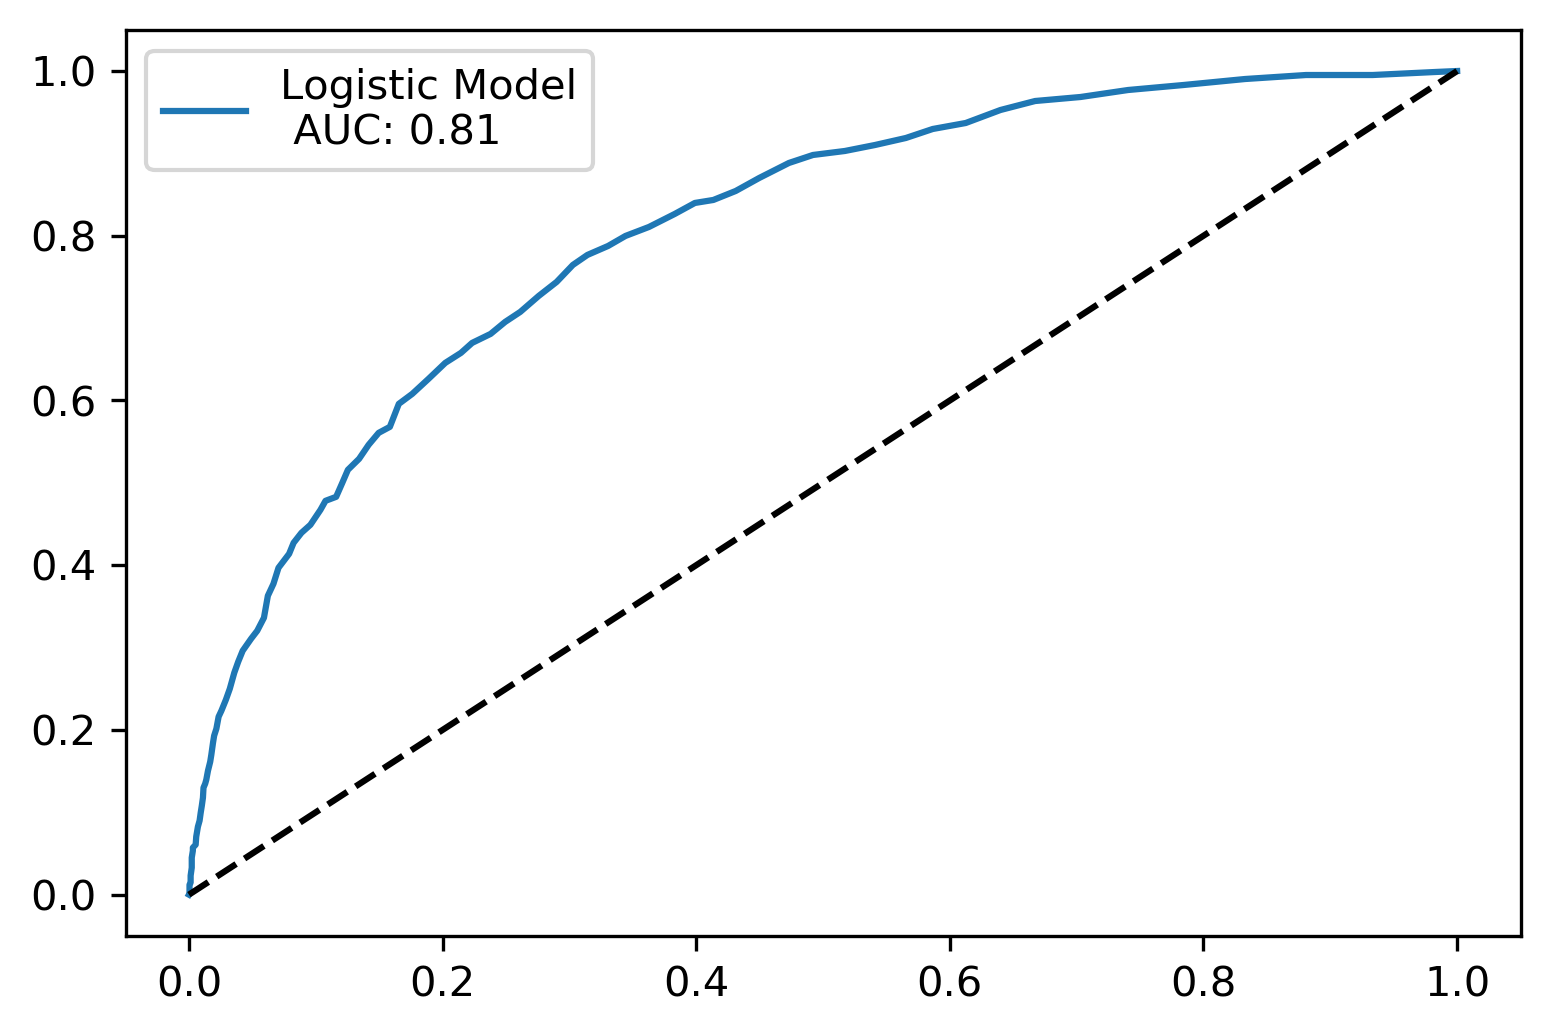

In [96]:
# ROC 그래프
fig, ax = plt.subplots(dpi=300)
x = r.ROCInfo['FPR']
y = r.ROCInfo['Sensitivity']
auc = r.ROCInfo['C'][0]
ax.plot(x, y, label=f'Logistic Model\n AUC: {np.round(auc, 2)}')
ax.plot([0, 1], [0, 1], color='black', ls='--')
ax.legend()

In [107]:
# decision tree 액션셋 적재
conn.loadactionset('decisionTree')

NOTE: Added action set 'decisionTree'.


[actionset]

 'decisionTree'

+ Elapsed: 0.00365s, user: 0.00276s, sys: 0.00301s, mem: 0.817mb

In [108]:
gb= conn.decisionTree.gbtreeTrain(
    #
    # 결정나무와 동일한 공통옵션
    #
    
    # 훈련 데이터 지정
    table={'name':'claim_part_impute', 'caslib':'casuser', 'where':'_PartInd_=1'},
    
    # 검증 데이터 지정
    validTable = {'name':'claim_part_impute', 'caslib':'casuser', 'where':'_PartInd_=0'},
 
    # 입력 변수 지정
    inputs=imp_xvars,

    # 목표 변수 지정
    target=target,

    # 범주 변수 지정
    nominals=imp_classvars +[target],

    # 연속 변수의 범주 개수 지정
    nBins=40,
    quantileBin=True, 

    # 최소 나무의 크기
    leafSize=5,

    # 변수 중요도 출력 여부
    varImp=True,

    #
    # 그래디언트 부스팅 초모수
    #
    
    # 씨앗값 정의
    seed=123, 
    
    # 목표변수 분포 정의
    distribution='BINARY',
    
    # 학습률
    learningRate=0.05, 
    
    # 결정나무 생성시 표본 추출 비율
    subSampleRate=0.6,
    
    # 분기 시 변수의 개수
    m=4, 
    
    # 나무의 최대 깊이: 약 분류기
    maxLevel=2,
    
    # 결정나무의 개수
    nTree=200,
 
    # 결과 저장:   분석가게 모델
    savestate={"name": "gb_model_astore", "replace": True},
)


NOTE: 440826 bytes were written to the table "gb_model_astore" in the caslib "CASUSER(viyademo01)".


In [110]:
# 출력물 
gb.keys()

odict_keys(['DTreeVarImpInfo', 'EvalMetricInfo', 'ModelInfo'])

In [111]:
gb['EvalMetricInfo']

,Progress,Metric
0,1.0,0.266667
1,2.0,0.266667
2,3.0,0.266667
3,4.0,0.266667
4,5.0,0.266667
...,...,...
195,196.0,0.231715
196,197.0,0.231715
197,198.0,0.231715
198,199.0,0.230097


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

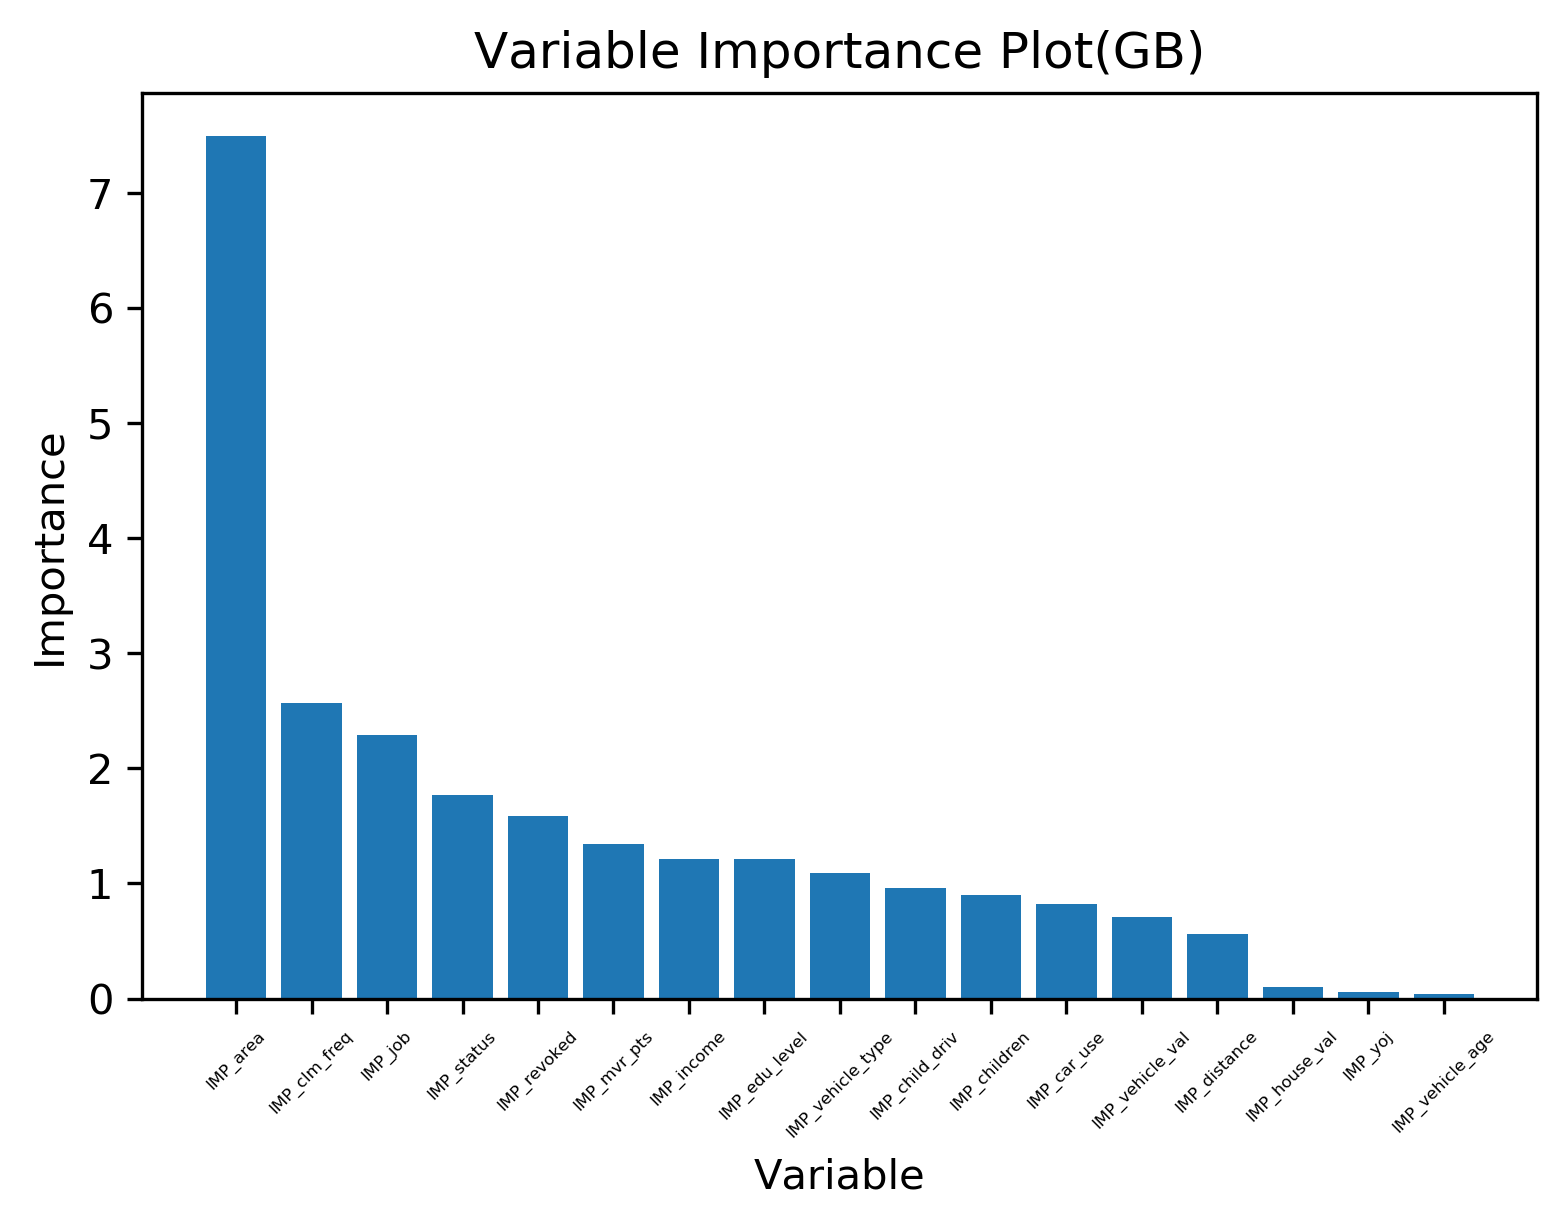

In [112]:
# 변수 중요도 그래프
fig, ax = plt.subplots(dpi=300)

# 그래프 구성요소 정의
x = np.arange(len(gb['DTreeVarImpInfo']))
variable = gb['DTreeVarImpInfo']['Variable']
importance = gb['DTreeVarImpInfo']['Importance']
std = gb['DTreeVarImpInfo']['Std']
width = 0.35

# 그래프
# ax.bar(x, importance, width, yerr=std)
ax.bar(x, importance)
ax.set_xlabel('Variable')
ax.set_ylabel('Importance')
ax.set_xticks(x)
ax.set_title('Variable Importance Plot(GB)')
ax.set_xticklabels(labels=variable, fontsize=4, rotation=45)
plt.show()

In [106]:
# 모델 스코어 액션셋
conn.loadactionset('astore')

NOTE: Added action set 'astore'.


[actionset]

 'astore'

+ Elapsed: 0.00378s, user: 0.00111s, sys: 0.00511s, mem: 0.817mb

In [113]:
# 모델 스코어
conn.astore.score(
    
    # 스코어 대상
    table = {'name': 'claim_part_impute', 'where': '_PartInd_=0'}, 
    
    # 스코어 모델
    rstore = 'gb_model_astore',
    
    # 복제할 변수 지정
    copyVars = [target], 
    
    # 점수 결과 테이블
    casOut = {'name': 'gb_score_out', 'replace': True}
)

[OutputCasTables]

                 casLib          Name  Rows  Columns  \
 0  CASUSER(viyademo01)  gb_score_out  3090        5   
 
                                             casTable  
 0  CASTable('gb_score_out', caslib='CASUSER(viyad...  

[Timing]

 Task Timing
 
                  Task   Seconds   Percent
 0   Loading the Store  0.003773  0.086295
 1  Creating the State  0.027532  0.629720
 2             Scoring  0.011934  0.272952
 3               Total  0.043721  1.000000

+ Elapsed: 0.0545s, user: 0.164s, sys: 0.0337s, mem: 228mb

In [115]:
gb_assess = conn.percentile.assess(
    # 평가 대상
    table = 'gb_score_out',
    
    # 실제 목표변수
    response = target,
    
    # 예측 변수 지정
    inputs = [{'name':'P_'+target+'1'}], 
    
    
    # ROC  정보값을 얻기위한 지정
    
    # 이벤트 값 지정
    event = '1',
    
    # 이벤트 제외 변수
    pVar = ['P_'+target+'0'],
    pEvent = ['0']
)

In [116]:
gb_assess.keys()

odict_keys(['FitStat', 'LIFTInfo', 'ROCInfo'])

In [117]:
gb_assess['FitStat']

,NOBS,ASE,DIV,RASE,MCE,MCLL
0,3090.0,0.156329,3090.0,0.395384,0.228803,0.477025


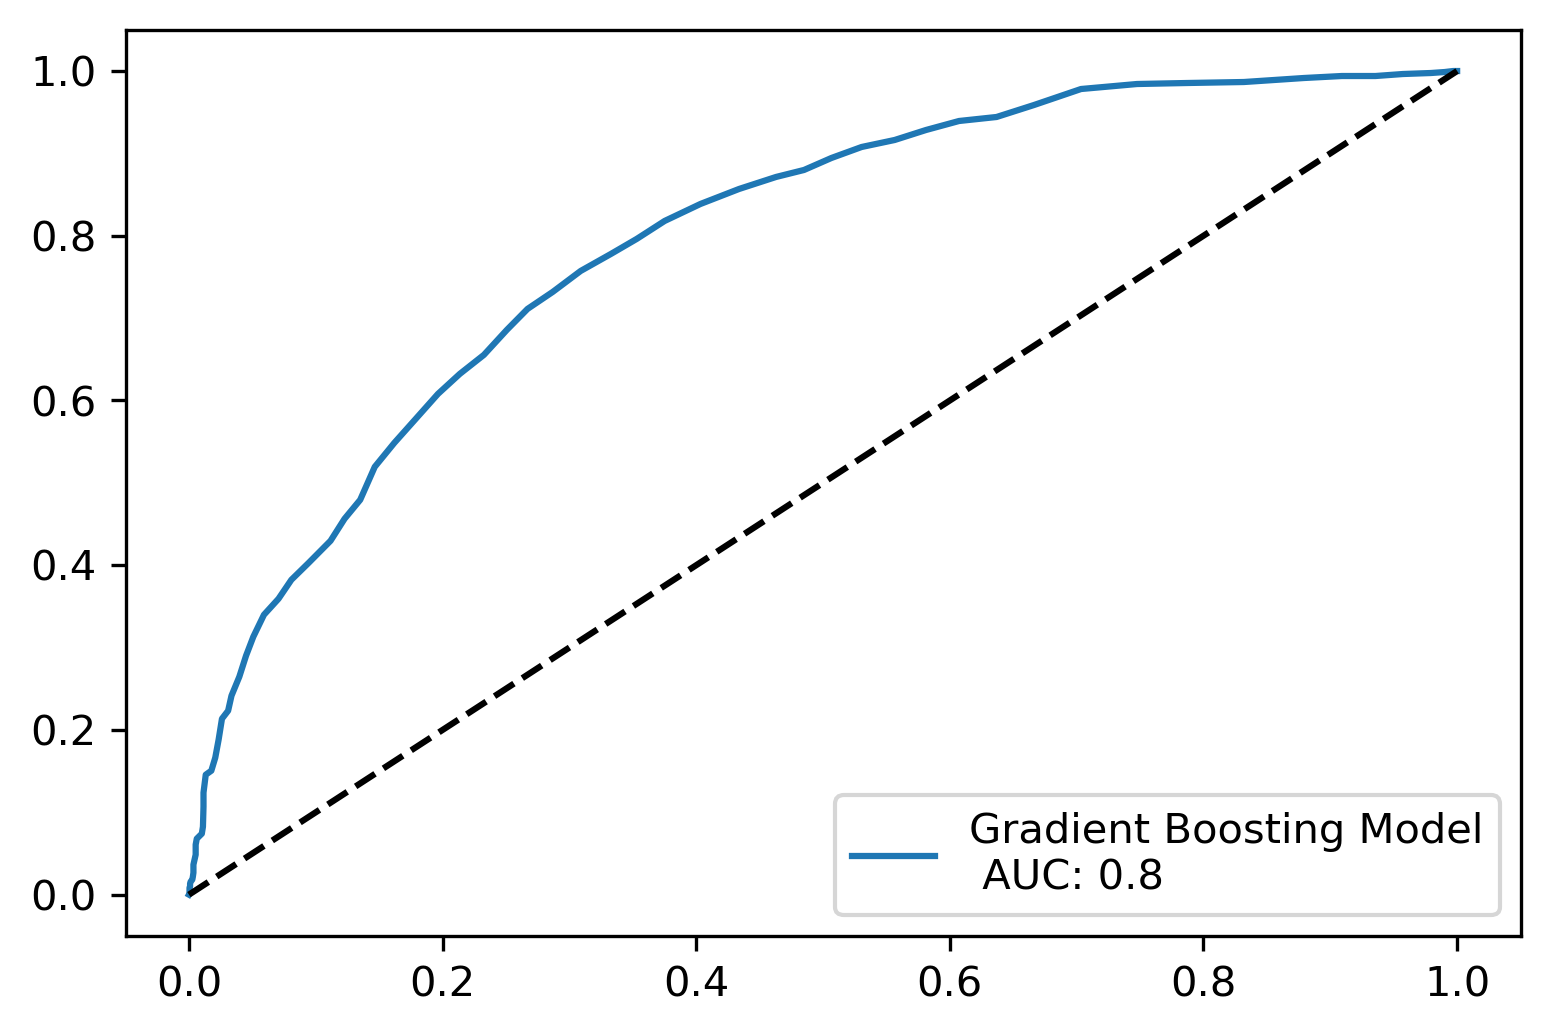

In [118]:
# ROC 그래프
fig, ax = plt.subplots(dpi=300)
x = gb_assess.ROCInfo['FPR']
y = gb_assess.ROCInfo['Sensitivity']
auc = gb_assess.ROCInfo['C'][0]
ax.plot(x, y, label=f'Gradient Boosting Model\n AUC: {np.round(auc, 2)}')
ax.plot([0, 1], [0, 1], color='black', ls='--')
ax.legend()

# 자동 조율

In [120]:
# autotune 적재
conn.loadactionset('autotune')

NOTE: Added action set 'autotune'.


[actionset]

 'autotune'

+ Elapsed: 0.0173s, user: 0.00229s, sys: 0.0111s, mem: 0.895mb

In [126]:
# 모델 자동조율: tuneGradientBoostTree

r_tune = conn.autotune.tuneGradientBoostTree(
    
    # 훈련 옵션
    trainOptions={
        'table':{'name':'claim_part_impute', 'caslib':'casuser', 'where':'_PartInd_=1'},
        'target':target, 
        'inputs':imp_xvars, 
        'nominals':imp_classvars + [target]
    },
    
    # 조율기 옵션
    tunerOptions={
        'seed':123,
        "searchMethod":"GA",
        "nCrossValFolds":2,
        "targetEvent":"1", 
        "objective":"GINI", 
        # 반복수마다 모델최대조합수
        "popSize":10,
        # 반복수
        "maxIters":5,
        # 병렬처리 스레드
        "nParallel":4, 
        # 목표이벤트 정의
        "targetEvent": event
    },
    
    # 자동조율 대상 초모수 및 범위 
    earlyStop=False,
    tuningParameters=[{'name':'nTree', "initValue":100, "valueList":[100, 200, 300]},
                      {'name':'m', "initValue":3, "valueList":[3, 4, 5]}, 
                      {'name':'learningrate', "initvalue":0.05, "lowerBound":0.05, "upperBound":0.1}]
)


NOTE: Autotune is started for 'Gradient Boosting Tree' model.
NOTE: Autotune option SEARCHMETHOD='GA'.
NOTE: Autotune option MAXTIME=36000 (sec.).
NOTE: Autotune option SEED=123.
NOTE: Autotune objective is 'Gini Coefficient'.
NOTE: Autotune number of parallel evaluations is set to 4, each using 1 worker nodes.
         Iteration       Evals     Best Objective  Elapsed Time
                 0           1               0.61          3.36
                 1          27             0.6188         49.13
                 2          50              0.621         88.81
                 3          75              0.621        130.45
                 4          95              0.621        163.99
                 5         113              0.621        194.60
NOTE: Autotune time is 198.01 seconds.


In [127]:
# 결과 키 확인
r_tune.keys()

odict_keys(['BestConfiguration', 'EncodedName', 'EncodedTargetName', 'ErrorMetricInfo', 'EvaluationHistory', 'FitStat', 'HyperparameterImportance', 'IterationHistory', 'ModelInfo', 'ROCInfo', 'ScoreInfo', 'TunerInfo', 'TunerResults', 'TunerSummary', 'TunerTiming'])

In [128]:
# 최적 조합 확인
r_tune["BestConfiguration"]

,Parameter,Name,Value
0,Evaluation,Evaluation,34
1,Number of Trees,NTREE,200
2,Number of Variables to Try,M,4
3,Learning Rate,LEARNINGRATE,0.05576675
4,Sampling Rate,SUBSAMPLERATE,0.61520602
5,Lasso,LASSO,2.71441937
6,Ridge,RIDGE,6.2589474
7,Number of Bins,NBINS,45
8,Maximum Tree Levels,MAXLEVEL,5
9,Gini Coefficient,Objective,0.6209815167


# 해석가능 머신러닝

In [129]:
# XAI 액션셋 불러오기
conn.loadactionset(actionset="explainModel")
conn.help(actionset="explainModel")

NOTE: Added action set 'explainModel'.
NOTE: Information for action set 'explainModel':
NOTE:    explainModel
NOTE:       linearExplainer - Uses linear models to explain already trained models. Supports global linear surrogates as well as the local methods: LIME and KERNEL SHAP.
NOTE:       partialDependence - Computes the partial dependence of an already trained model.
NOTE:       shapleyExplainer - Computes Shapley value estimates for a query given a reference table


,name,description
0,linearExplainer,Uses linear models to explain already trained ...
1,partialDependence,Computes the partial dependence of an already ...
2,shapleyExplainer,Computes Shapley value estimates for a query g...


In [130]:
# 관심 데이터
query_url = 'https://github.com/bong-ju-kang/data/raw/master/bank_query.csv'
query = conn.read_csv(query_url, casout = {'name':'query', 'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table QUERY in caslib CASUSER(viyademo01).
NOTE: The table QUERY has been created in caslib CASUSER(viyademo01) from binary data uploaded to Cloud Analytic Services.


In [134]:
!ls -al

total 2468
drwxr-xr-x.  3 viyademo01 sasusers    224 Dec 19 11:33 .
drwxr-xr-x. 25 viyademo01 sasusers   4096 Oct 19 05:59 ..
-rw-r--r--.  1 viyademo01 sasusers 276393 Dec 19 06:51 banene.ipynb
-rw-r--r--.  1 viyademo01 sasusers 151871 Dec 19 07:01 bnn_connect_test (3).ipynb
-rw-r--r--.  1 viyademo01 sasusers 116043 Oct 19 02:37 hands-on-2.ipynb
-rw-r--r--.  1 viyademo01 sasusers 309691 Oct 19 00:26 hands-on.ipynb
-rw-r--r--.  1 viyademo01 sasusers 847683 Dec 19 11:33 HANDS_ON.ipynb
drwxr-xr-x.  2 viyademo01 sasusers   4096 Dec 19 07:10 .ipynb_checkpoints
-rw-r--r--.  1 viyademo01 sasusers 198749 Oct 18 00:53 test code 3.ipynb
-rw-r--r--.  1 viyademo01 sasusers 405683 Sep  5 09:09 Test Code.ipynb
-rw-r--r--.  1 viyademo01 sasusers 194243 Sep  7 07:27 Untitled.ipynb


In [135]:
conn.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TMP63S07HY5,10300,23,0,utf-8,2022-12-19T10:33:38+00:00,2022-12-19T10:33:38+00:00,2022-12-19T10:33:38+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:33:38+00:00,1.987065e+09
1,CLAIM,10300,23,0,utf-8,2022-12-19T10:33:50+00:00,2022-12-19T10:33:50+00:00,2022-12-19T10:34:06+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:33:50+00:00,1.987065e+09
2,EXPLORE_OUT,23,42,0,utf-8,2022-12-19T10:33:59+00:00,2022-12-19T10:33:59+00:00,2022-12-19T10:33:59+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
3,GCR,1000,21,0,utf-8,2022-12-19T10:34:00+00:00,2022-12-19T10:34:00+00:00,2022-12-19T10:34:02+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:34:00+00:00,1.987065e+09
4,CLAIM_PART,10300,24,0,utf-8,2022-12-19T10:34:06+00:00,2022-12-19T10:34:06+00:00,2022-12-19T10:34:13+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
5,TRAIN_IMPUTE_OUT,7210,21,0,utf-8,2022-12-19T10:34:11+00:00,2022-12-19T10:34:11+00:00,2022-12-19T10:34:11+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
6,IMPUTE_CODE,1,10,0,utf-8,2022-12-19T10:34:11+00:00,2022-12-19T10:34:11+00:00,2022-12-19T10:34:13+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
7,CLAIM_PART_IMPUTE,10300,24,0,utf-8,2022-12-19T10:34:13+00:00,2022-12-19T10:34:13+00:00,2022-12-19T11:21:07+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
8,LOGISTIC_MODEL_ASTORE,3,2,0,utf-8,2022-12-19T10:36:51+00:00,2022-12-19T10:36:51+00:00,2022-12-19T10:38:28+00:00,UTF8,1.987065e+09,...,0,0,0,logistic_model_astore.sashdat,CASUSER(viyademo01),0,viyademo01,,2022-12-19T10:36:13+00:00,1.987065e+09
9,LOGISTIC_SCORE_OUT,3090,4,0,utf-8,2022-12-19T10:38:28+00:00,2022-12-19T10:38:28+00:00,2022-12-19T11:08:41+00:00,UTF8,1.987066e+09,...,0,0,0,,,0,viyademo01,,,NaN


In [152]:
# 질의 대상 데이터 정의
conn.CASTable('claim_part_impute').head(0).to_csv('claim_query.csv')

In [153]:
# 데이터 확인
!ls -al

total 2508
drwxr-xr-x.  3 viyademo01 sasusers    247 Dec 19 11:43 .
drwxr-xr-x. 25 viyademo01 sasusers   4096 Oct 19 05:59 ..
-rw-r--r--.  1 viyademo01 sasusers 276393 Dec 19 06:51 banene.ipynb
-rw-r--r--.  1 viyademo01 sasusers 151871 Dec 19 07:01 bnn_connect_test (3).ipynb
-rw-r--r--.  1 viyademo01 sasusers    432 Dec 19 11:45 claim_query.csv
-rw-r--r--.  1 viyademo01 sasusers 116043 Oct 19 02:37 hands-on-2.ipynb
-rw-r--r--.  1 viyademo01 sasusers 309691 Oct 19 00:26 hands-on.ipynb
-rw-r--r--.  1 viyademo01 sasusers 881380 Dec 19 11:43 HANDS_ON.ipynb
drwxr-xr-x.  2 viyademo01 sasusers   4096 Dec 19 07:10 .ipynb_checkpoints
-rw-r--r--.  1 viyademo01 sasusers 198749 Oct 18 00:53 test code 3.ipynb
-rw-r--r--.  1 viyademo01 sasusers 405683 Sep  5 09:09 Test Code.ipynb
-rw-r--r--.  1 viyademo01 sasusers 194243 Sep  7 07:27 Untitled.ipynb


In [151]:
# 데이터 올리기
conn.upload('./claim_query.csv', casOut={'name':'claim_query', 'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table CLAIM_QUERY in caslib CASUSER(viyademo01).
NOTE: The table CLAIM_QUERY has been created in caslib CASUSER(viyademo01) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(viyademo01)'

[tableName]

 'CLAIM_QUERY'

[casTable]

 CASTable('CLAIM_QUERY', caslib='CASUSER(viyademo01)')

+ Elapsed: 0.0676s, user: 0.0215s, sys: 0.0509s, mem: 198mb

In [178]:
# 데이터 확인
conn.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TMP63S07HY5,10300,23,0,utf-8,2022-12-19T10:33:38+00:00,2022-12-19T10:33:38+00:00,2022-12-19T10:33:38+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:33:38+00:00,1.987065e+09
1,CLAIM,10300,23,0,utf-8,2022-12-19T10:33:50+00:00,2022-12-19T10:33:50+00:00,2022-12-19T10:34:06+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:33:50+00:00,1.987065e+09
2,EXPLORE_OUT,23,42,0,utf-8,2022-12-19T10:33:59+00:00,2022-12-19T10:33:59+00:00,2022-12-19T10:33:59+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
3,GCR,1000,21,0,utf-8,2022-12-19T10:34:00+00:00,2022-12-19T10:34:00+00:00,2022-12-19T10:34:02+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,2022-12-19T10:34:00+00:00,1.987065e+09
4,CLAIM_PART,10300,24,0,utf-8,2022-12-19T10:34:06+00:00,2022-12-19T10:34:06+00:00,2022-12-19T10:34:13+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
5,TRAIN_IMPUTE_OUT,7210,21,0,utf-8,2022-12-19T10:34:11+00:00,2022-12-19T10:34:11+00:00,2022-12-19T10:34:11+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
6,IMPUTE_CODE,1,10,0,utf-8,2022-12-19T10:34:11+00:00,2022-12-19T10:34:11+00:00,2022-12-19T10:34:13+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
7,CLAIM_PART_IMPUTE,10300,24,0,utf-8,2022-12-19T10:34:13+00:00,2022-12-19T10:34:13+00:00,2022-12-19T12:00:46+00:00,UTF8,1.987065e+09,...,0,0,0,,,0,viyademo01,,,NaN
8,LOGISTIC_MODEL_ASTORE,3,2,0,utf-8,2022-12-19T10:36:51+00:00,2022-12-19T10:36:51+00:00,2022-12-19T12:00:46+00:00,UTF8,1.987065e+09,...,0,0,0,logistic_model_astore.sashdat,CASUSER(viyademo01),0,viyademo01,,2022-12-19T10:36:13+00:00,1.987065e+09
9,GB_MODEL_ASTORE,1,2,0,utf-8,2022-12-19T10:54:34+00:00,2022-12-19T10:54:34+00:00,2022-12-19T12:02:21+00:00,UTF8,1.987066e+09,...,0,0,0,,,0,viyademo01,,,NaN


In [162]:
#  스코어 기준 데이터
base = conn.CASTable('claim_part_impute', where='_PartInd_=0').sample(100)

In [171]:
# 스코어 샘플
conn.astore.score(
    
    # 스코어 대상
#     table = {'name': 'claim_part_impute', 'where': '_PartInd_=0'}, 
    table = base, 
    
    # 스코어 모델
    rstore = 'gb_model_astore',
    
    # 복제할 변수 지정
    copyVars = imp_xvars, 
    
    # 점수 결과 테이블
    casOut = {'name': 'gb_score_out_base', 'replace': True}
)

[OutputCasTables]

                 casLib               Name  Rows  Columns  \
 0  CASUSER(viyademo01)  gb_score_out_base   100       24   
 
                                             casTable  
 0  CASTable('gb_score_out_base', caslib='CASUSER(...  

[Timing]

 Task Timing
 
                  Task   Seconds   Percent
 0   Loading the Store  0.004106  0.128747
 1  Creating the State  0.018138  0.568735
 2             Scoring  0.009011  0.282562
 3               Total  0.031892  1.000000

+ Elapsed: 0.0404s, user: 0.0945s, sys: 0.045s, mem: 227mb

In [167]:
# 점수 확인
conn.CASTable('gb_score_out_base').head()

,P_claim_ind1,P_claim_ind0,I_claim_ind,_WARN_,IMP_child_driv,IMP_age,IMP_children,IMP_yoj,IMP_income,IMP_house_val,...,IMP_distance,IMP_car_use,IMP_vehicle_val,IMP_vehicle_type,IMP_clm_freq,IMP_revoked,IMP_mvr_pts,IMP_vehicle_age,IMP_area,IMP_state_code
0,0.523765,0.476235,1,,2.0,50.0,2.0,3.0,560.0,512241.0,...,53.0,Private,5900.0,unknown,5.0,No,0.0,13.0,Highly U,Mecklenb
1,0.236380,0.763620,0,,0.0,46.0,0.0,10.0,71273.0,299841.0,...,100.0,Private,14960.0,Minivan,5.0,No,5.0,6.0,Highly U,Bayern
2,0.232459,0.767541,0,,0.0,72.0,0.0,19.0,164118.0,443587.0,...,89.0,Commerci,23320.0,Panel Tr,2.0,No,3.0,21.0,Highly U,Berlin
3,0.289722,0.710278,0,,0.0,50.0,0.0,11.0,79877.0,241733.0,...,50.0,Private,6100.0,Pickup,2.0,No,11.0,8.0,Highly U,Berlin
4,0.174957,0.825043,0,,0.0,68.0,0.0,9.0,52835.0,251550.0,...,102.0,Private,14060.0,Minivan,1.0,No,3.0,8.0,Highly U,Bayern


In [173]:
# HYPER SHAP 모델 적합
r_shap = conn.shapleyExplainer(
    table           = conn.CASTable("gb_score_out_base"),
    query           = conn.CASTable("claim_query"), 
    modelTable      = {"name" : "gb_model_astore"},
    modelTableType  = "ASTORE",
    inputs = imp_xvars,
    nominals = imp_classvars,
    predictedTarget = 'P_claim_ind1',
    depth           = 1
 )


NOTE: Starting the Shapley Explainer Action.
NOTE: Generating data replicates.
NOTE: Replicates generated.
NOTE: Scoring data replicates.
NOTE: Replicates scored.
NOTE: Aggregating data scores.
NOTE: Scores aggregated.


In [179]:
# 산출물 확인
r_shap

,Variable,ShapleyValue
0,Intercept,0.278933
1,IMP_child_driv,-0.009245
2,IMP_age,0.000000
3,IMP_children,-0.013195
4,IMP_yoj,-0.000430
5,IMP_income,0.008358
6,IMP_house_val,-0.001035
7,IMP_distance,-0.010336
8,IMP_vehicle_val,-0.009726
9,IMP_clm_freq,-0.026341


In [175]:
# SHAP 값
r_shap['ShapleyValues'].T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Variable,Intercept,IMP_child_driv,IMP_age,IMP_children,IMP_yoj,IMP_income,IMP_house_val,IMP_distance,IMP_vehicle_val,IMP_clm_freq,...,IMP_vehicle_age,IMP_status,IMP_gender,IMP_edu_level,IMP_job,IMP_car_use,IMP_vehicle_type,IMP_revoked,IMP_area,IMP_state_code
ShapleyValue,0.278933,-0.00924479,0,-0.0131948,-0.000430059,0.00835773,-0.00103504,-0.0103363,-0.00972633,-0.0263412,...,-0.00073253,0.0455938,0,-0.0170712,0.0257634,-0.0111572,-0.024692,-0.0108832,0.015434,0


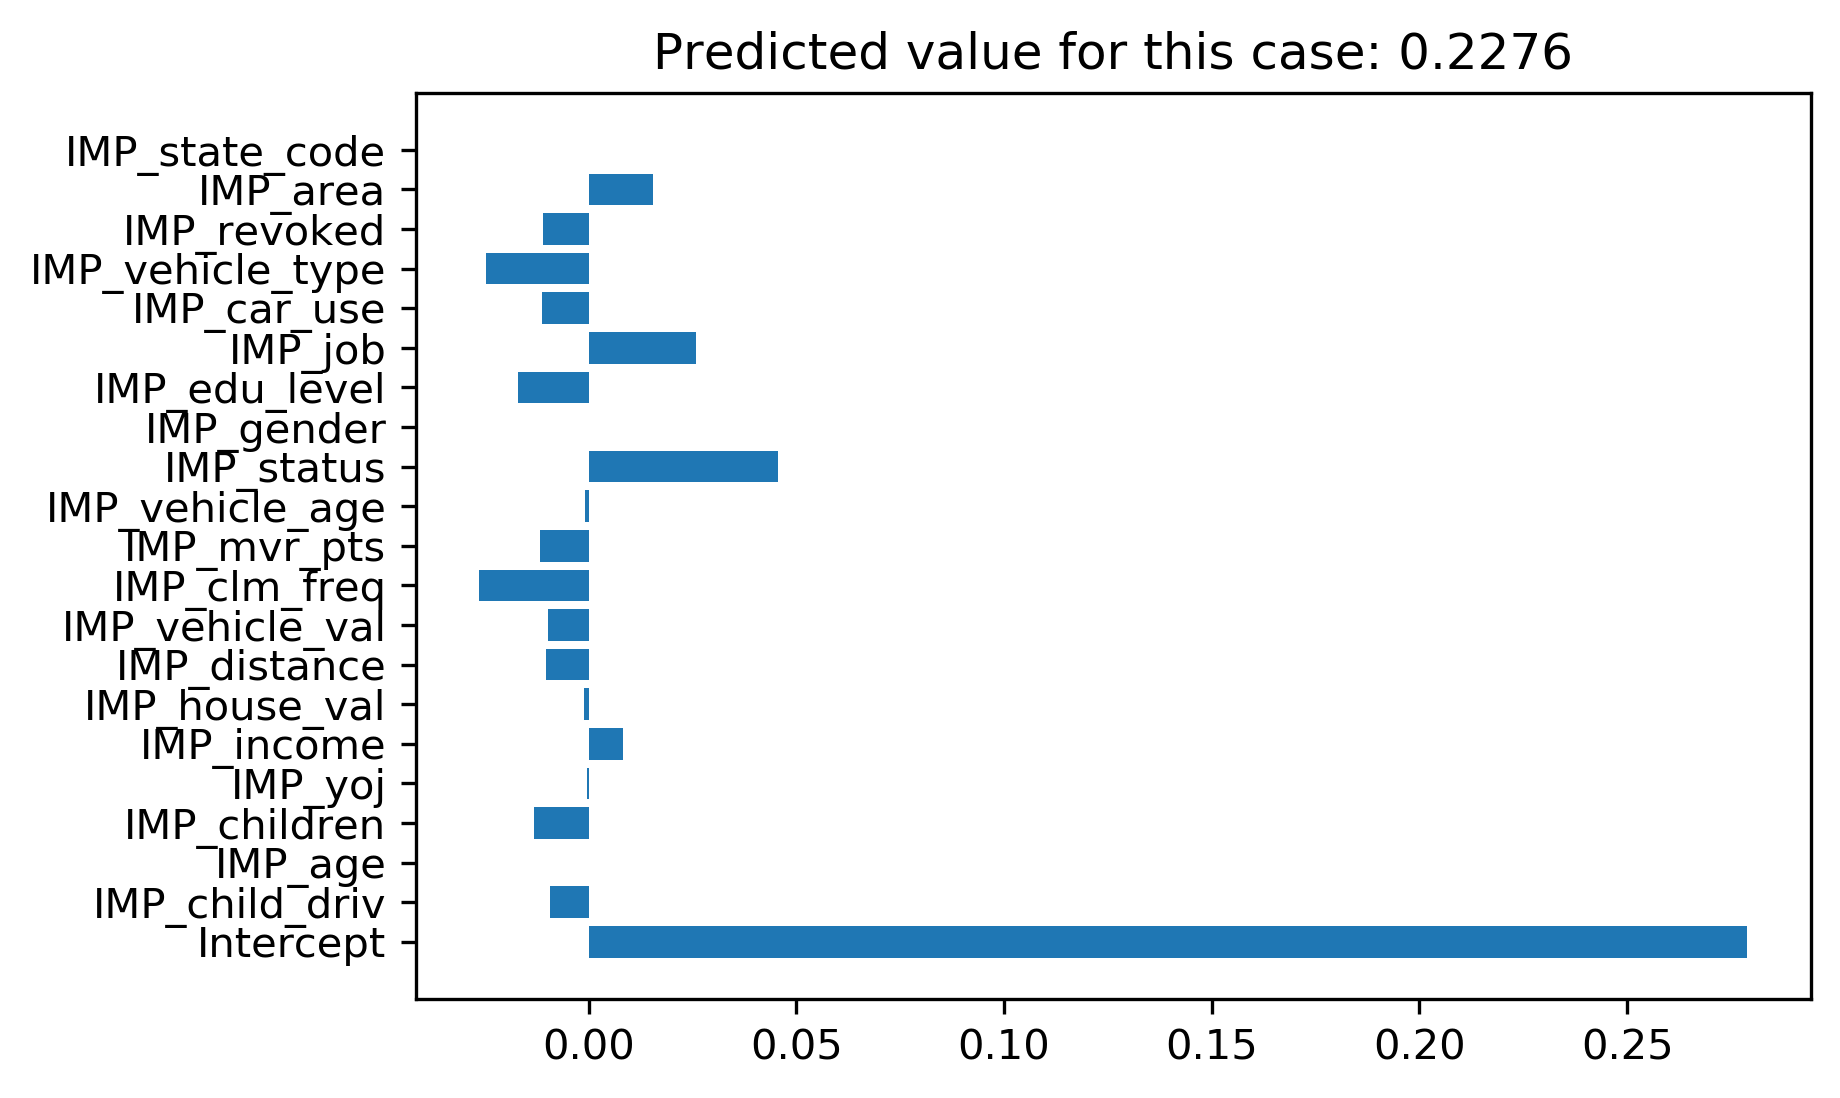

In [180]:
# 샤플리 plot
fig, ax = plt.subplots(dpi=300)
ax.barh(r_shap['ShapleyValues']['Variable'], r_shap['ShapleyValues']['ShapleyValue'])
ax.set_title(f"Predicted value for this case: {r_shap['ShapleyValues']['ShapleyValue'].sum().round(4)}")
plt.show()

In [183]:
# 질의 정보
conn.CASTable('claim_query').head().T

,0
Var1,0
id,6.92163e+09
claim_amount,294
claim_ind,0
_PartInd_,1
IMP_child_driv,0
IMP_age,67
IMP_children,0
IMP_yoj,14
IMP_income,53841
